<a href="https://colab.research.google.com/github/gabrieldimas/periapical-photo-caries-detection-using-deep-learning/blob/main/filtering_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import shutil

dataset_path = "/content/dataset_2.rar"

if os.path.exists(dataset_path):
    !unrar x -o+ /content/dataset_2.rar /content/
else:
    print("Dataset tidak ditemukan!")


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/dataset_2.rar

Creating    /content/dataset_2                                        OK
Creating    /content/dataset_2/test                                   OK
Creating    /content/dataset_2/test/caries_media                      OK
Extracting  /content/dataset_2/test/caries_media/caries-102-_png_tooth_1_png.rf.6f66d02aa32872d4f617f8b8c54f0cc0.jpg       0%  OK 
Extracting  /content/dataset_2/test/caries_media/caries-149-_png_tooth_2_png.rf.03bc01825ae3bf723af834324e2f66e6.jpg       0%  OK 
Extracting  /content/dataset_2/test/caries_media/caries-184-_png_tooth_1_png.rf.eac890739131153c768a9dfcc24b1bef.jpg       0%  OK 
Extracting  /content/dataset_2/test/caries_media/caries-207-_png_tooth_0_png.rf.4ba2e07178b2b4d8288b2e28d4642854.jpg       0%  OK 
Extracting  /content/dataset_2/test/caries_media/caries-210-_png_tooth_1_png.rf.d9b71752634095fa37e0275a2

In [2]:
import cv2

if not os.path.exists('/content/dataset_3'):
    os.makedirs('/content/dataset_3')

In [9]:
import os
import cv2
import shutil

# Path dataset
dataset_2_path = '/content/dataset_2'
dataset_3_path = '/content/dataset_3'

# Buat folder dataset_3 jika belum ada
if not os.path.exists(dataset_3_path):
    os.makedirs(dataset_3_path)

# Loop melalui semua file dan folder di dataset_2
for root, dirs, files in os.walk(dataset_2_path):
    # Buat struktur folder yang sama di dataset_3
    for dir_name in dirs:
        dest_dir = os.path.join(dataset_3_path, os.path.relpath(root, dataset_2_path), dir_name)
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)

    # Filter dan simpan gambar
    for filename in files:
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            source_path = os.path.join(root, filename)
            dest_path = os.path.join(dataset_3_path, os.path.relpath(root, dataset_2_path), filename)

            img = cv2.imread(source_path)
            filtered_img = cv2.bilateralFilter(img, d=12, sigmaColor=100, sigmaSpace=100)
            cv2.imwrite(dest_path, filtered_img)

print("Proses filtering selesai. Gambar yang sudah difilter disimpan di folder 'dataset_3' dengan struktur yang sama.")

Proses filtering selesai. Gambar yang sudah difilter disimpan di folder 'dataset_3' dengan struktur yang sama.


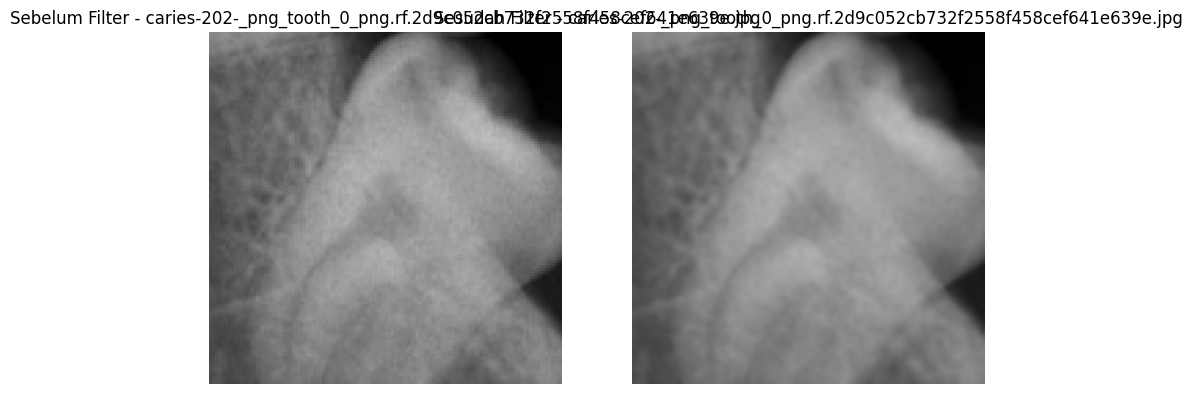

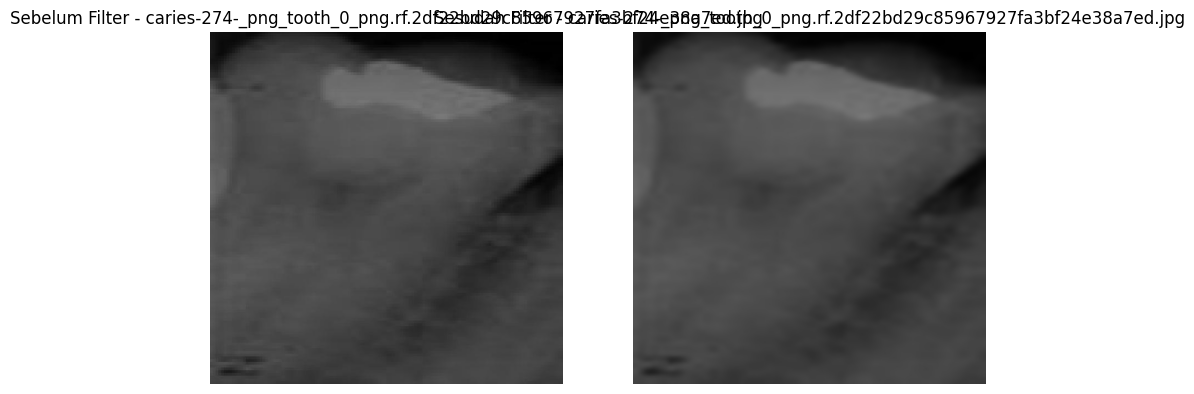

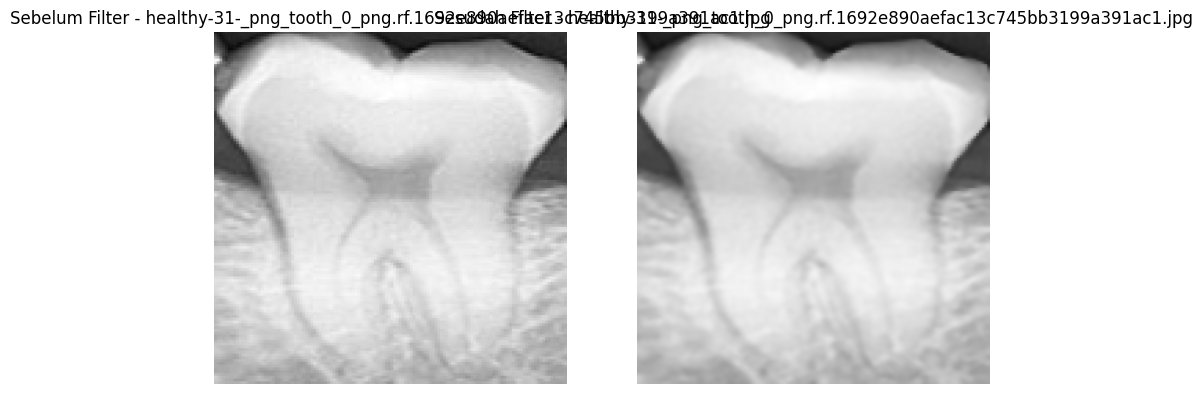

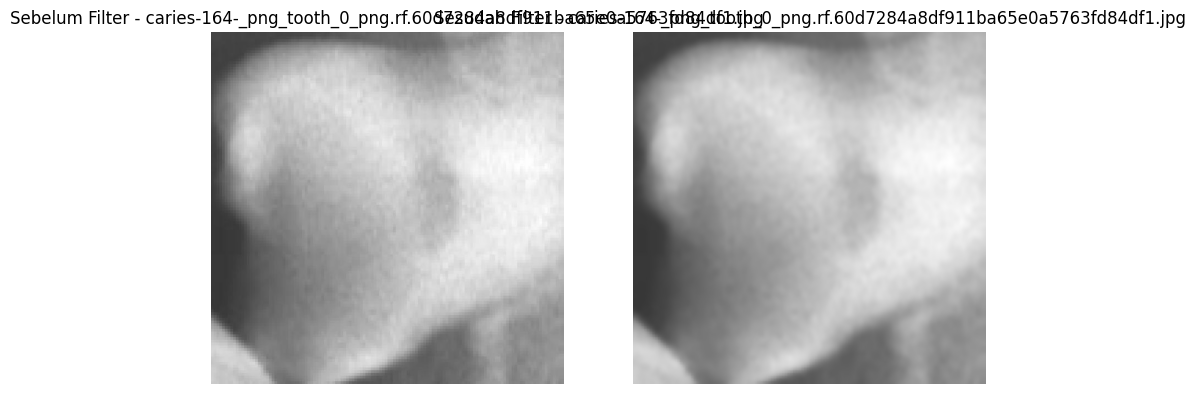

In [11]:
import matplotlib.pyplot as plt
import cv2
import os
import random

# Fungsi untuk menampilkan gambar sebelum dan sesudah
def tampilkan_perbandingan(original_img, filtered_img, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Sebelum Filter - ' + title)
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Sesudah Filter - ' + title)
    axes[1].axis('off')
    plt.show()

# Path dataset
dataset_2_path = '/content/dataset_2'
dataset_3_path = '/content/dataset_3'

# Ambil 4 gambar acak dari dataset_2
all_image_paths = []
for root, _, files in os.walk(dataset_2_path):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            all_image_paths.append(os.path.join(root, file))

random_image_paths = random.sample(all_image_paths, 4)

# Tampilkan perbandingan untuk setiap gambar yang dipilih
for image_path in random_image_paths:
    # Dapatkan path relatif untuk gambar di dataset_3
    relative_path = os.path.relpath(image_path, dataset_2_path)
    filtered_image_path = os.path.join(dataset_3_path, relative_path)

    # Baca gambar asli dan yang sudah difilter
    original_img = cv2.imread(image_path)
    filtered_img = cv2.imread(filtered_image_path)

    # Tampilkan perbandingan
    image_name = os.path.basename(image_path)  # Dapatkan nama file
    tampilkan_perbandingan(original_img, filtered_img, image_name)

In [12]:
import shutil

folder_path = "/content/dataset_3"
zip_path = "/content/dataset_3.zip"

shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

from google.colab import files
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import os
import cv2
import shutil

# Path dataset
dataset_2_path = '/content/dataset_2'
dataset_4_path = '/content/dataset_4'

# Buat folder dataset_4 jika belum ada
if not os.path.exists(dataset_4_path):
    os.makedirs(dataset_4_path)

# Loop melalui semua file dan folder di dataset_2
for root, dirs, files in os.walk(dataset_2_path):
    # Buat struktur folder yang sama di dataset_4
    for dir_name in dirs:
        dest_dir = os.path.join(dataset_4_path, os.path.relpath(root, dataset_2_path), dir_name)
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)

    # Filter dan simpan gambar
    for filename in files:
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            source_path = os.path.join(root, filename)
            dest_path = os.path.join(dataset_4_path, os.path.relpath(root, dataset_2_path), filename)

            # Baca gambar dalam mode grayscale
            img = cv2.imread(source_path, cv2.IMREAD_GRAYSCALE)

            # Buat objek CLAHE
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

            # Terapkan CLAHE
            filtered_img = clahe.apply(img)

            cv2.imwrite(dest_path, filtered_img)

print("Proses filtering selesai. Gambar yang sudah difilter disimpan di folder 'dataset_4' dengan struktur yang sama.")

Proses filtering selesai. Gambar yang sudah difilter disimpan di folder 'dataset_4' dengan struktur yang sama.


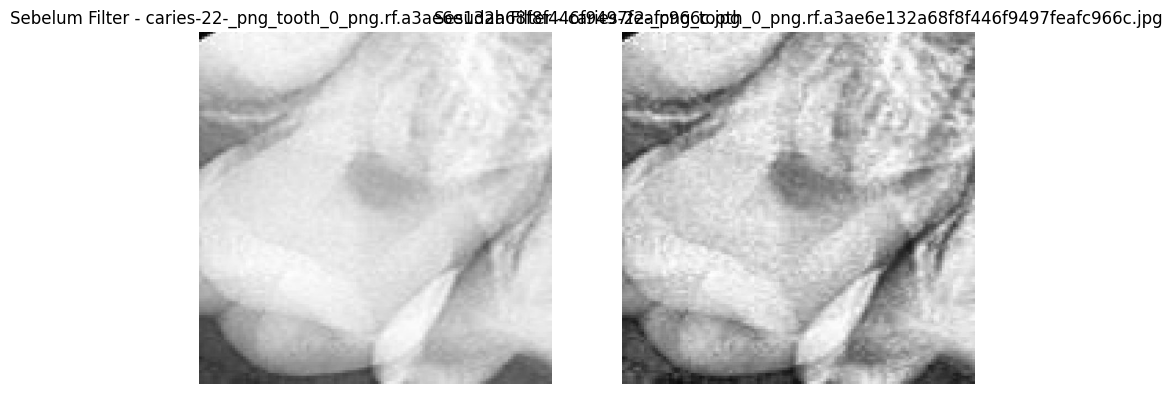

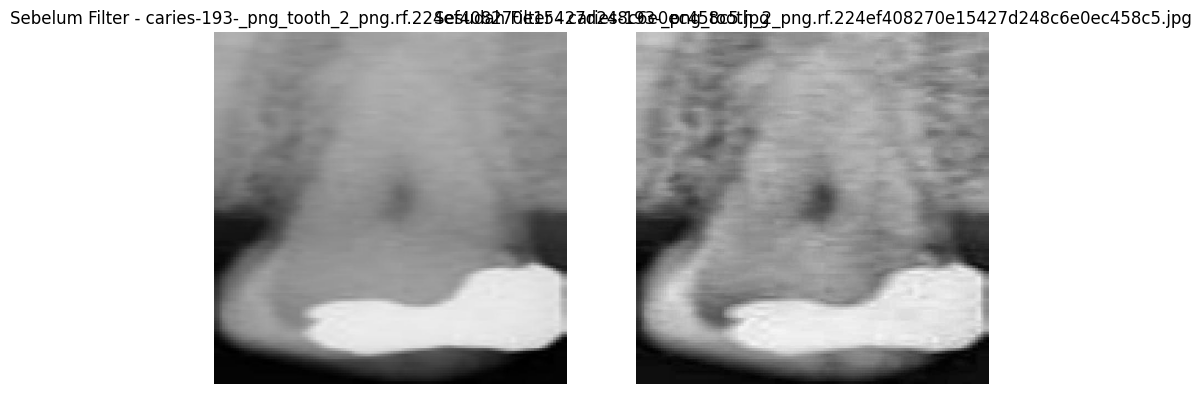

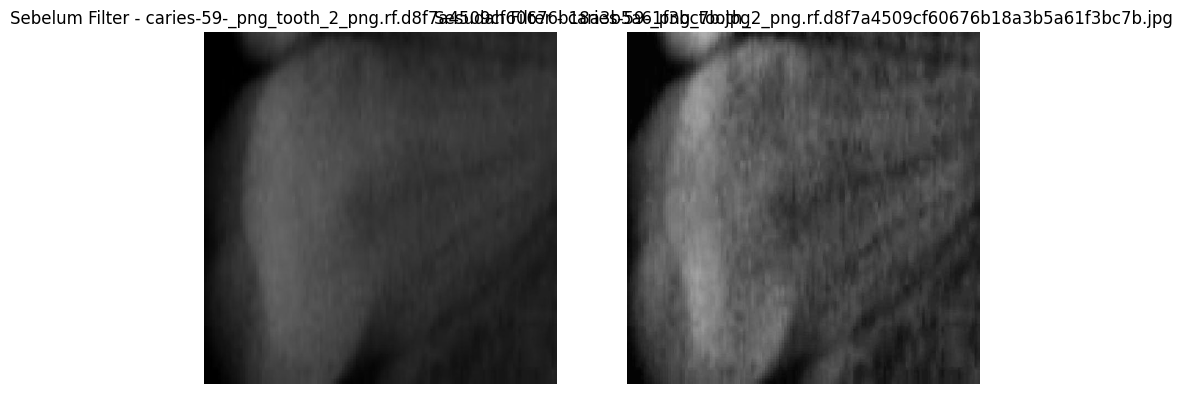

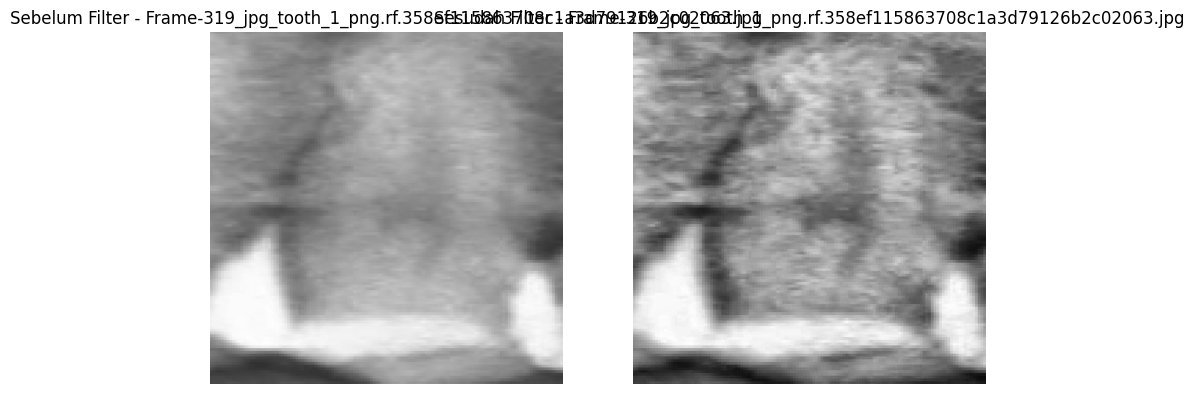

In [14]:
import matplotlib.pyplot as plt
import cv2
import os
import random

# Fungsi untuk menampilkan gambar sebelum dan sesudah
def tampilkan_perbandingan(original_img, filtered_img, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Sebelum Filter - ' + title)
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Sesudah Filter - ' + title)
    axes[1].axis('off')
    plt.show()

# Path dataset
dataset_2_path = '/content/dataset_2'
dataset_4_path = '/content/dataset_4'

# Ambil 4 gambar acak dari dataset_2
all_image_paths = []
for root, _, files in os.walk(dataset_2_path):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            all_image_paths.append(os.path.join(root, file))

random_image_paths = random.sample(all_image_paths, 4)

# Tampilkan perbandingan untuk setiap gambar yang dipilih
for image_path in random_image_paths:
    # Dapatkan path relatif untuk gambar di dataset_4
    relative_path = os.path.relpath(image_path, dataset_2_path)
    filtered_image_path = os.path.join(dataset_4_path, relative_path)

    # Baca gambar asli dan yang sudah difilter
    original_img = cv2.imread(image_path)
    filtered_img = cv2.imread(filtered_image_path)

    # Tampilkan perbandingan
    image_name = os.path.basename(image_path)  # Dapatkan nama file
    tampilkan_perbandingan(original_img, filtered_img, image_name)

In [15]:
import shutil

folder_path = "/content/dataset_4"
zip_path = "/content/dataset_4.zip"

shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

from google.colab import files
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import os
import cv2
import shutil

# Path dataset
dataset_2_path = '/content/dataset_2'
dataset_5_path = '/content/dataset_5'

# Buat folder dataset_5 jika belum ada
if not os.path.exists(dataset_5_path):
    os.makedirs(dataset_5_path)

# Loop melalui semua file dan folder di dataset_2
for root, dirs, files in os.walk(dataset_2_path):
    # Buat struktur folder yang sama di dataset_5
    for dir_name in dirs:
        dest_dir = os.path.join(dataset_5_path, os.path.relpath(root, dataset_2_path), dir_name)
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)

    # Filter dan simpan gambar
    for filename in files:
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            source_path = os.path.join(root, filename)
            dest_path = os.path.join(dataset_5_path, os.path.relpath(root, dataset_2_path), filename)

            # Baca gambar dalam mode grayscale
            img = cv2.imread(source_path, cv2.IMREAD_GRAYSCALE)

            # Buat objek CLAHE
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

            # Terapkan CLAHE
            img_clahe = clahe.apply(img)

            # Terapkan Bilateral Filtering
            filtered_img = cv2.bilateralFilter(img_clahe, d=12, sigmaColor=100, sigmaSpace=100)

            cv2.imwrite(dest_path, filtered_img)

print("Proses filtering selesai. Gambar yang sudah difilter disimpan di folder 'dataset_5' dengan struktur yang sama.")

Proses filtering selesai. Gambar yang sudah difilter disimpan di folder 'dataset_5' dengan struktur yang sama.


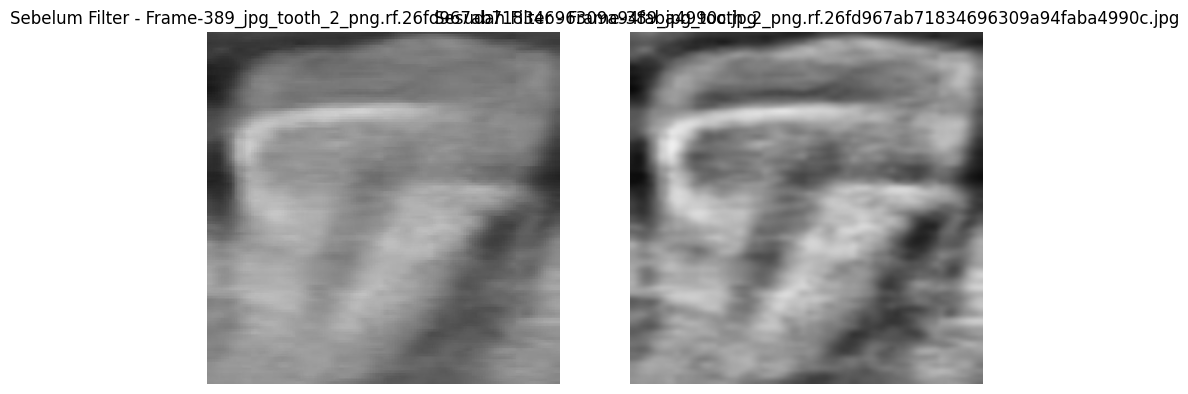

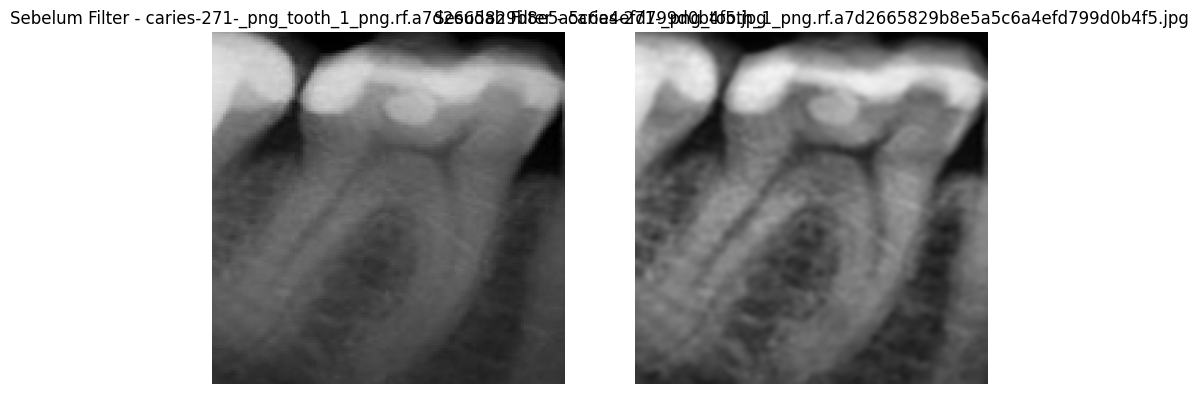

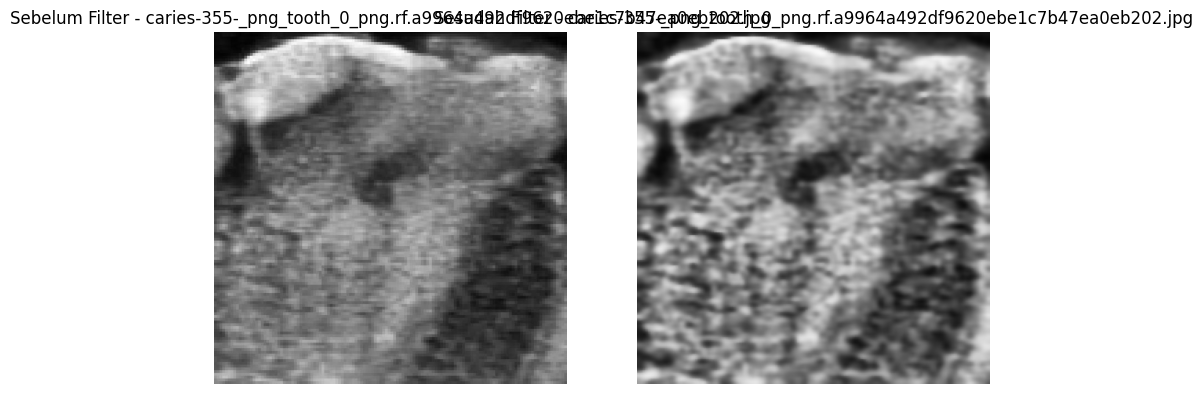

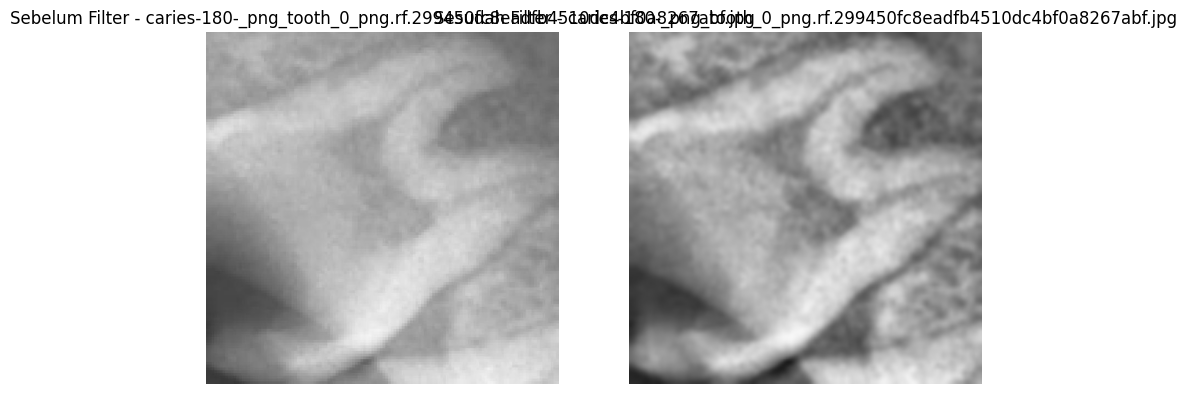

In [17]:
import matplotlib.pyplot as plt
import cv2
import os
import random

# Fungsi untuk menampilkan gambar sebelum dan sesudah
def tampilkan_perbandingan(original_img, filtered_img, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Sebelum Filter - ' + title)
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Sesudah Filter - ' + title)
    axes[1].axis('off')
    plt.show()

# Path dataset
dataset_2_path = '/content/dataset_2'
dataset_4_path = '/content/dataset_5'

# Ambil 4 gambar acak dari dataset_2
all_image_paths = []
for root, _, files in os.walk(dataset_2_path):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            all_image_paths.append(os.path.join(root, file))

random_image_paths = random.sample(all_image_paths, 4)

# Tampilkan perbandingan untuk setiap gambar yang dipilih
for image_path in random_image_paths:
    # Dapatkan path relatif untuk gambar di dataset_5
    relative_path = os.path.relpath(image_path, dataset_2_path)
    filtered_image_path = os.path.join(dataset_5_path, relative_path)

    # Baca gambar asli dan yang sudah difilter
    original_img = cv2.imread(image_path)
    filtered_img = cv2.imread(filtered_image_path)

    # Tampilkan perbandingan
    image_name = os.path.basename(image_path)  # Dapatkan nama file
    tampilkan_perbandingan(original_img, filtered_img, image_name)

In [18]:
import shutil

folder_path = "/content/dataset_5"
zip_path = "/content/dataset_5.zip"

shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

from google.colab import files
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>